In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [1]:
# 1

In [4]:
pi = np.pi
x = np.arange(0, (2*pi), (2*pi)/(1000)) #Takes x from 0 to 2 pi with 1000 points
x

array([0.        , 0.00628319, 0.01256637, 0.01884956, 0.02513274,
       0.03141593, 0.03769911, 0.0439823 , 0.05026548, 0.05654867,
       0.06283185, 0.06911504, 0.07539822, 0.08168141, 0.08796459,
       0.09424778, 0.10053096, 0.10681415, 0.11309734, 0.11938052,
       0.12566371, 0.13194689, 0.13823008, 0.14451326, 0.15079645,
       0.15707963, 0.16336282, 0.169646  , 0.17592919, 0.18221237,
       0.18849556, 0.19477874, 0.20106193, 0.20734512, 0.2136283 ,
       0.21991149, 0.22619467, 0.23247786, 0.23876104, 0.24504423,
       0.25132741, 0.2576106 , 0.26389378, 0.27017697, 0.27646015,
       0.28274334, 0.28902652, 0.29530971, 0.30159289, 0.30787608,
       0.31415927, 0.32044245, 0.32672564, 0.33300882, 0.33929201,
       0.34557519, 0.35185838, 0.35814156, 0.36442475, 0.37070793,
       0.37699112, 0.3832743 , 0.38955749, 0.39584067, 0.40212386,
       0.40840704, 0.41469023, 0.42097342, 0.4272566 , 0.43353979,
       0.43982297, 0.44610616, 0.45238934, 0.45867253, 0.46495

In [7]:
A = np.arange(0.5, 3, 0.5) #Sets up array values for Amplitude, 0.5 to 2, with 0.5 step size
w = np.arange(1, 6) #Sets up array values for frequency, 1 to 5, with standard step size

A_w_pairs = np.array(tuple(zip(A, w)))
A_w_pairs # Pairs each value of A and w with zip function, turns it into an array

array([[0.5, 1. ],
       [1. , 2. ],
       [1.5, 3. ],
       [2. , 4. ],
       [2.5, 5. ]])

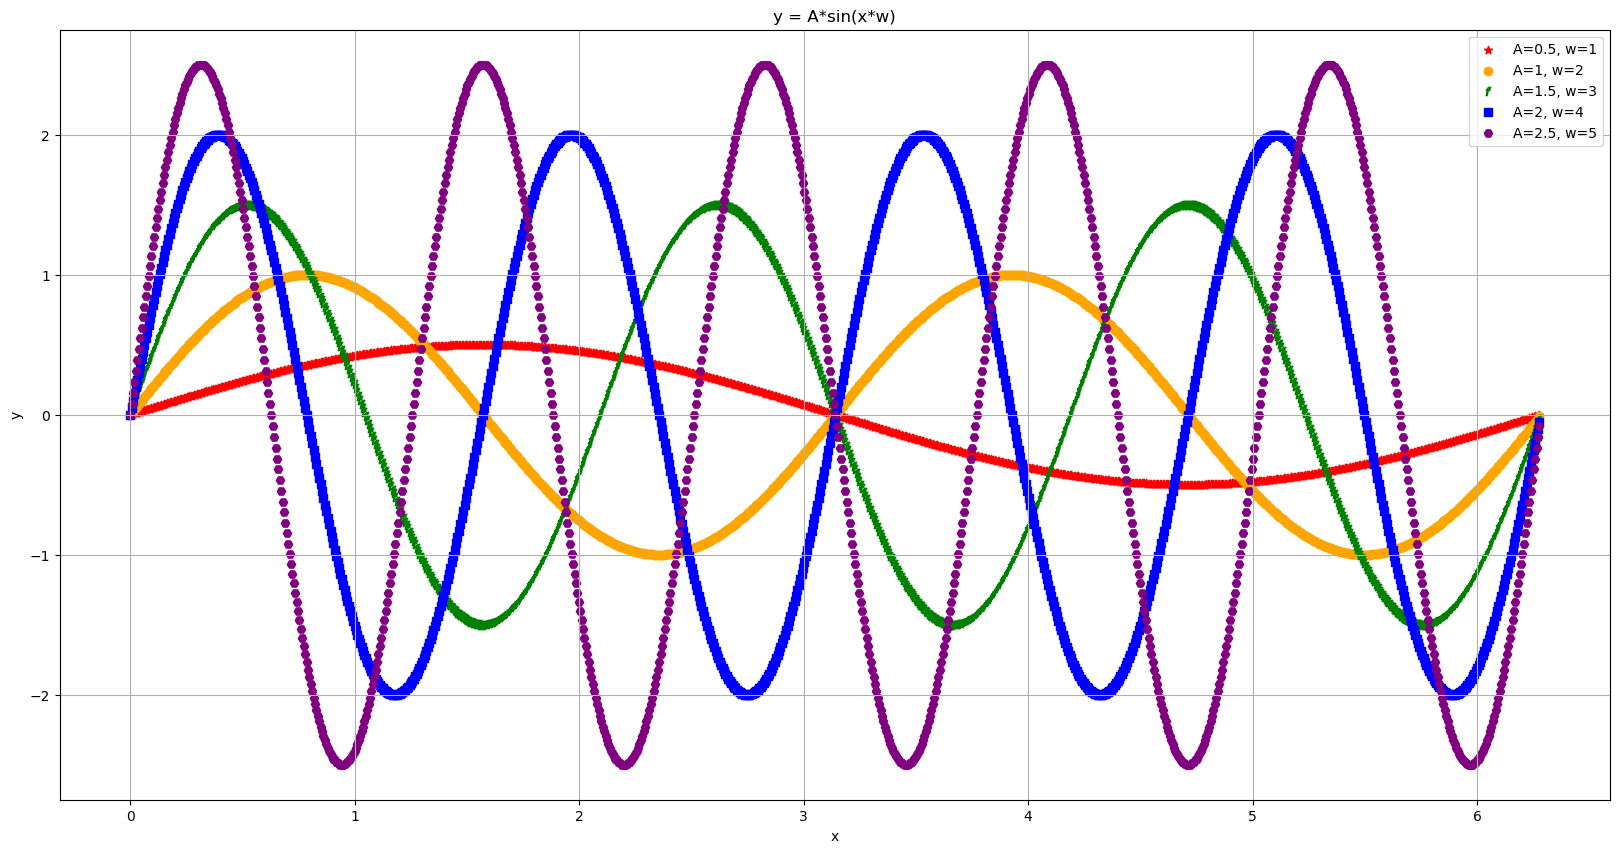

In [8]:
y1 = (A_w_pairs[0,0])*np.sin(x*(A_w_pairs[0,1]))
y2 = (A_w_pairs[1,0])*np.sin(x*(A_w_pairs[1,1]))
y3 = (A_w_pairs[2,0])*np.sin(x*(A_w_pairs[2,1]))
y4 = (A_w_pairs[3,0])*np.sin(x*(A_w_pairs[3,1]))
y5 = (A_w_pairs[4,0])*np.sin(x*(A_w_pairs[4,1]))

plt.figure(figsize=(20, 10))
plt.scatter(x, y1, color="red", marker="*", label="A=0.5, w=1")
plt.scatter(x, y2, color="orange", marker="o", label="A=1, w=2")
plt.scatter(x, y3, color="green", marker="$f$", label="A=1.5, w=3")
plt.scatter(x, y4, color="blue", marker="s", label="A=2, w=4")
plt.scatter(x, y5, color="purple", marker="H", label="A=2.5, w=5")

plt.xlabel("x")
plt.ylabel("y")
plt.title("y = A*sin(x*w)")
plt.legend()
plt.grid()
plt.show()

In [ ]:
# 2

In [17]:
star_data = pd.read_csv("stars.csv")
star_data[0:5]

,Name,Distance (ly),Mass (M☉),Radius (R☉),Temperature (K),Spectral_Type
0,Proxima Centauri,4.24,0.12,0.14,3042,M5.5Ve
1,Alpha Centauri A,4.37,1.10,1.22,5790,G2V
2,Alpha Centauri B,4.37,0.91,0.86,5260,K1V
3,Barnard's Star,5.96,0.16,0.20,3134,M4Ve
4,Wolf 359,7.86,0.09,0.16,2800,M6.5Ve


In [18]:
rows = len(star_data) # Number of rows
rows

10

In [19]:
columns = star_data.shape[1] # Number of columns
columns

6

In [20]:
star_data.dtypes # Shows the names of the columns with their corresponding data type

Name                object
Distance (ly)      float64
Mass (M☉)          float64
Radius (R☉)        float64
Temperature (K)      int64
Spectral_Type       object
dtype: object

In [21]:
mean_mass = np.mean(star_data.loc[:,'Mass (M☉)'])
mean_mass

0.579

In [22]:
mean_temp = np.mean(star_data.loc[:,'Temperature (K)'])
mean_temp

6370.6

In [23]:
# max_radius = np.max(star_data['Radius (R☉)'])
# max_radius # Find which star has this max

max_radius = star_data.sort_values(['Radius (R☉)'])[0:1]
largest_star = max_radius['Name']
largest_star

6    Sirius B
Name: Name, dtype: object

In [24]:
type_M = star_data[star_data['Spectral_Type'].str.startswith('M')]
len(type_M) # Sorts star dataframe only with the stars that start with M, hence an M type, then lists out how many have them

6

In [25]:
closest = star_data.sort_values(['Distance (ly)'])[0:3]
closest_stars = np.array(closest['Name'])
closest_stars

array(['Proxima Centauri', 'Alpha Centauri A', 'Alpha Centauri B'],
      dtype=object)

In [409]:
type_M.to_csv("m_type_stars.csv")

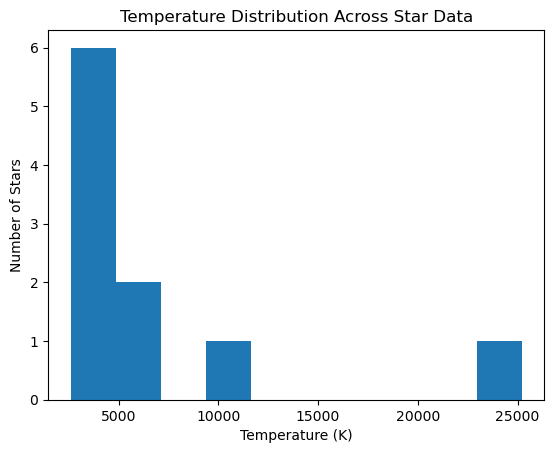

In [26]:
plt.hist(star_data['Temperature (K)'], bins=10)
plt.xlabel("Temperature (K)")
plt.ylabel("Number of Stars")
plt.title("Temperature Distribution Across Star Data")
plt.show()

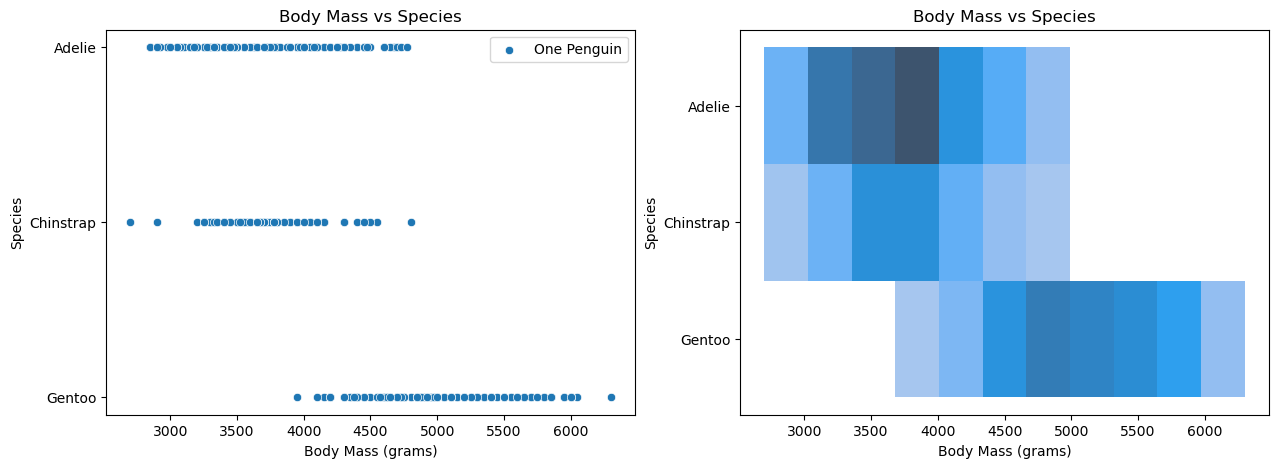

In [460]:
#3
penguins = sns.load_dataset("penguins")
fig, axes = plt.subplots(1, 2, figsize=(15, 5))
sns.scatterplot(x='body_mass_g', y='species', data=penguins, ax=axes[0], label="One Penguin")
sns.histplot(x='body_mass_g', y='species', data=penguins, ax=axes[1])
axes[0].set_title('Body Mass vs Species')
axes[1].set_title('Body Mass vs Species')
axes[0].set_xlabel('Body Mass (grams)')
axes[0].set_ylabel('Species')
axes[1].set_xlabel('Body Mass (grams)')
axes[1].set_ylabel('Species')
axes[0].legend()